In [1]:
# Importo las funciones necesarias

from tokenizer import Tokenizer
from sat import Sat
from generator import Generator
import files

In [2]:
# Puedo crear una expresion manualmente

expression = 'a and b and (c and not a or (not d and a and c)) and (c or d or f or (b and not c))'

In [38]:
# Puedo generar expresiones automaticamente

gen = Generator(clause_count=6, literals_per_clause=6, variable_count=17, var_name='x')

expression = gen.generate()

In [3]:
# Genero los tokens para identificar las variables de la expresion

tokenizer = Tokenizer(expression)
tokens, var_names = tokenizer.tokenize()

print('Expresion:', expression)
print('\nContador de tokens:', tokens)
print('\nVariables de la expresion:', var_names)

Expresion: a and b and (c and not a or (not d and a and c)) and (c or d or f or (b and not c))

Contador de tokens: {'and': 7, 'or': 4, 'not': 3, '(': 4, ')': 4, 'var': 12}

Variables de la expresion: ['a', 'b', 'c', 'd', 'f']


In [4]:
# ejecuto el algoritmo, que toma como parametros la expresion, el arreglo de variables
# y un booleano que indica si se hace un reporte de las operaciones

sat = Sat()

result_sat, time = sat.sat_algorithm(expression, var_names, verbose=False)

print('\nExecution time {} seconds'.format(time))

if len(result_sat) > 0:
        print('\nExpression "{}" is True'.format(expression))

        print('\nNumber of solutions is {}\n'.format(len(result_sat)))

        if len(result_sat) < 10:

                for result in result_sat:

                        print(result)
else:
        print('\nExpression "{}" is False'.format(expression))


Execution time 0.0011805999999978667 seconds

Expression "a and b and (c and not a or (not d and a and c)) and (c or d or f or (b and not c))" is True

Number of solutions is 2

{'a': 1, 'b': 1, 'c': 1, 'd': 0, 'f': 0}
{'a': 1, 'b': 1, 'c': 1, 'd': 0, 'f': 1}


In [4]:
# Funcion para graficar los resultados

import matplotlib.pyplot as plt

def plot_historic(nodes, times):

    plt.plot(nodes, times)
    #plt.scatter(nodes, times)

    plt.xlabel('Cantidad de variables')
    plt.ylabel('Ejecucion en minutos')

    plt.suptitle('Crecimiento del costo temporal')
    
    plt.savefig('sat.png', dpi=600)

    plt.show()

In [19]:
files.reset_result()

for n in range(2, 22):

    gen = Generator(clause_count=(n), literals_per_clause=(n//2), variable_count=n, var_name='x')
    expression = gen.generate()

    print('Evaluating...')

    tokenizer = Tokenizer(expression)
    _, var_names = tokenizer.tokenize()

    sat = Sat()

    _, time = sat.sat_algorithm(expression, var_names, verbose=False)

    result = "{},{}\r".format(n, time)

    # Guardo los resultados
    files.save_result(result)

Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...


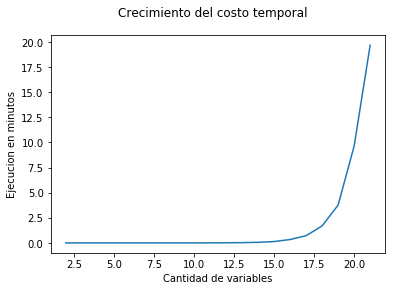

In [5]:
# Leo los resultados y los grafico

results = files.read_result()

nodes = []
times = []

for result in results:

    res = result.split(',')
    res[1] = res[1].split()[0]

    nodes.append(int(res[0]))
    times.append(float(res[1]) / 60)

plot_historic(nodes, times)